# Introduction

The goal of this project is to predict the performance of students. I found this dataset on kaggle :
[text](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

I took this dataset because it seems good to perform regression and the goal of this Git is to build a portfolio with different models.

# Import

In [1]:
import sys
import os

import sklearn


import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\anton\AppData\Local\Temp\ipykernel_18928\1798112473.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Where to save the figures

PROJECT_ROOT_DIR = ""

PROJECT_ID = "Student_performance_ML"
IMAGES_PATH = os.path.join("figures")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
def save_fig(fig_id, tight_layout = True, fig_extension="png", resolution = 300):

    """Save a figure
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)

    print("Saving figure", fig_id)

    if tight_layout:
        plt.tight_layout()
    
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load the Data

In [4]:
PATH_DATA = os.path.join("data", "Student_Performance.csv")

def load_data_student(student_path = PATH_DATA):
    csv_path = student_path
    return pd.read_csv(csv_path)

# Quick look at the data

In [5]:
student = load_data_student()
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
student["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [8]:
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Saving figure histogram_attribute_plots


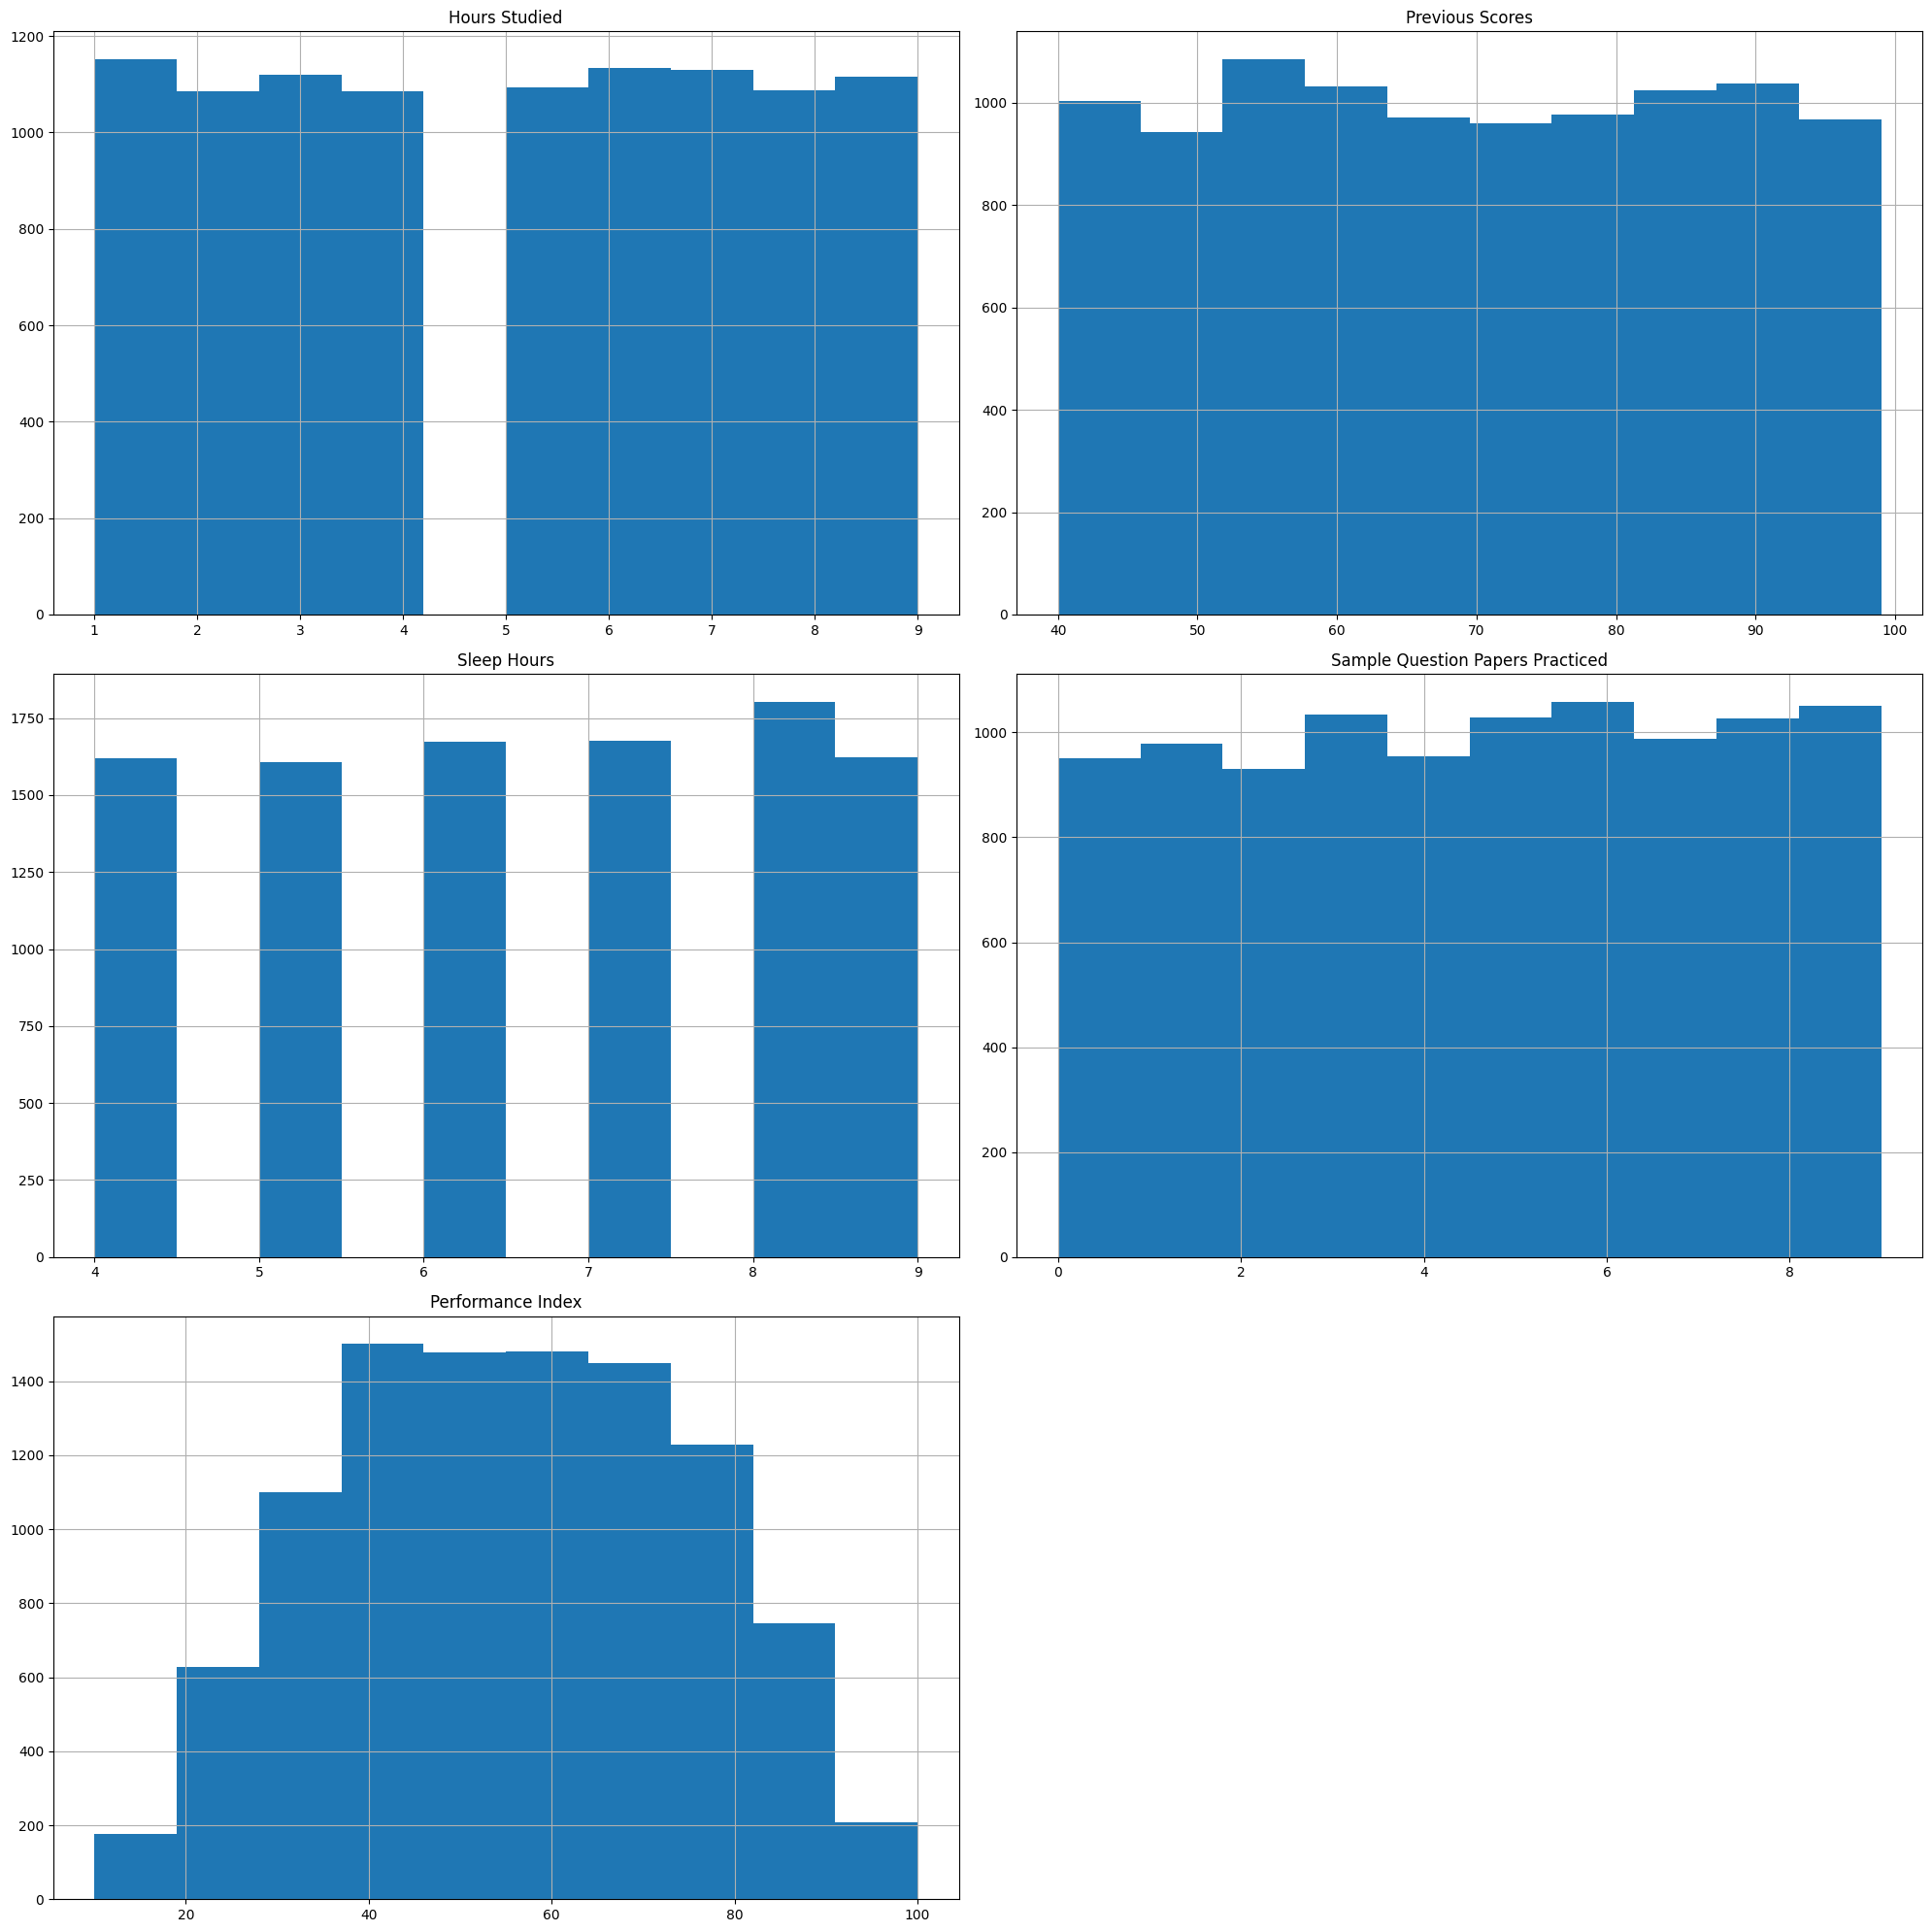

In [9]:
student.hist(figsize=(20,20))
save_fig("histogram_attribute_plots")
plt.show()

# Create a test set

Actually scikit has a function to do it but I wanted to do it by myself for a demo but I'll use the one made by the library

In [10]:
def split_train_test(data, test_ratio, random_seed = 42):

    # To make the notebook indentical at every run

    np.random.seed(random_seed)

    shuffled_indices = np.random.permutation(len(data))

    test_set_size = int(len(data) * test_ratio)

    test_indices = shuffled_indices[:test_set_size]

    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]


In [11]:
train_set, test_set = split_train_test(student, 0.2)

In [12]:
len(test_set)

2000

In [13]:
len(train_set)

8000

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)

In [13]:
test_set.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,No,8,2,51.0
4684,2,46,Yes,4,8,20.0
1731,7,56,Yes,7,5,46.0
4742,6,42,Yes,8,5,28.0
4521,7,53,No,4,6,41.0


<Axes: >

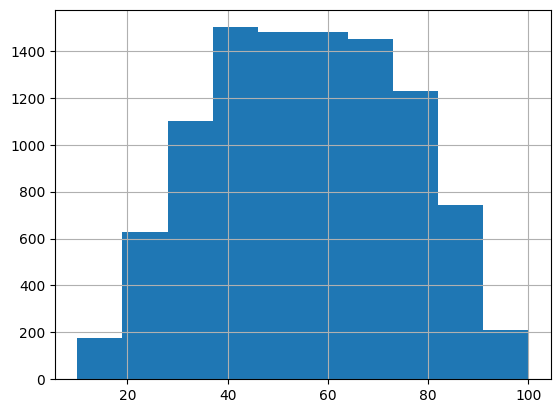

In [14]:
student["Performance Index"].hist()

In [17]:
student["Performance Index"].value_counts()

Performance Index
67.0     187
45.0     185
56.0     181
49.0     181
40.0     180
        ... 
14.0       7
99.0       6
11.0       5
100.0      3
10.0       1
Name: count, Length: 91, dtype: int64

I'll do category. Why ? Because as we can see, there is only one value with a score of 10, so I think it's better to build category with value range.
So then, I can split my data with a homogeneous distribution of all category between train set and test set

In [34]:
student["perf_cat"] = pd.cut(student["Performance Index"],
                             bins = [0, 30, 40, 50, 60, 70, 80, 100],
                             labels = [1, 2, 3, 4, 5, 6, 7])

In [35]:
student["perf_cat"].value_counts()


perf_cat
3    1694
4    1622
5    1617
2    1446
6    1435
1    1116
7    1070
Name: count, dtype: int64

In [36]:
len(student["perf_cat"]) # I check if I lose nothing

10000

So here I build a train set, and a test set, with a good distribution of category. This avoid my model to never seen someone with a low score or high score

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(student, student["perf_cat"]):
    strat_train_set = student.loc[train_index]
    strat_test_set = student.loc[test_index]

<Axes: >

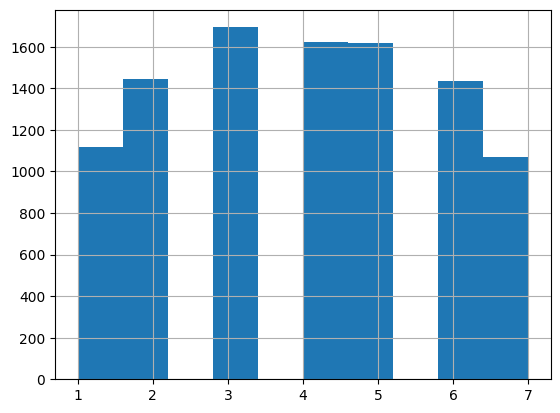

In [38]:
student["perf_cat"].hist()

In [39]:
strat_test_set["perf_cat"].value_counts() / len(strat_test_set) #Check the proportions

perf_cat
3    0.1695
4    0.1625
5    0.1615
2    0.1445
6    0.1435
1    0.1115
7    0.1070
Name: count, dtype: float64

I check if the proportion are respected

In [40]:
student["perf_cat"].value_counts() / len(student)

perf_cat
3    0.1694
4    0.1622
5    0.1617
2    0.1446
6    0.1435
1    0.1116
7    0.1070
Name: count, dtype: float64

In [41]:
def proportions(data):
    return data["perf_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": proportions(student),
    "Stratified": proportions(strat_test_set),
    "Random": proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [42]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
perf_cat,,,,,
1,0.1116,0.1115,0.116,3.942652,-0.089606
2,0.1446,0.1445,0.139,-3.872752,-0.069156
3,0.1694,0.1695,0.178,5.076741,0.059032
4,0.1622,0.1625,0.160,-1.356350,0.184957
5,0.1617,0.1615,0.159,-1.669759,-0.123686
6,0.1435,0.1435,0.149,3.832753,0.000000
7,0.1070,0.1070,0.099,-7.476636,0.000000


The repartition is not that bad. Before I'd 10 category but the repartition was bad.

In [43]:
# Make data as before
for set_ in (strat_train_set, strat_test_set):
    set_.drop("perf_cat", axis=1, inplace=True)

# Vizualize Data

In [44]:
student = strat_train_set.copy() #Let's copy the set to not change it

<Axes: xlabel='Performance Index', ylabel='Hours Studied'>

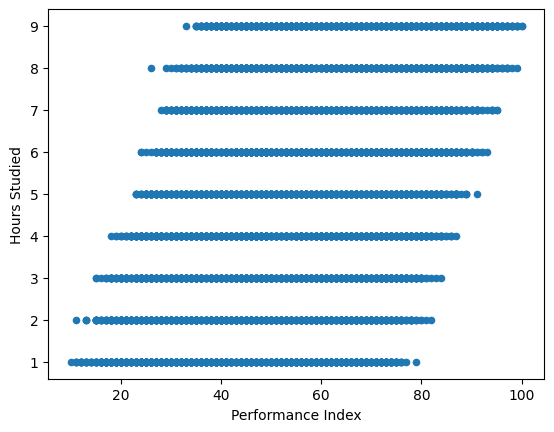

In [45]:
student.plot(kind='scatter', x='Performance Index', y = 'Hours Studied')

# Correlation

In [46]:
student["Extracurricular Activities"] = student["Extracurricular Activities"].replace({"Yes": 1, "No": 0}) #Otherwise I can't check the correlation

C:\Users\anton\AppData\Local\Temp\ipykernel_18928\2081247612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student["Extracurricular Activities"] = student["Extracurricular Activities"].replace({"Yes": 1, "No": 0}) #Otherwise I can't check the correlation


In [47]:
corr_matrix = student.corr()

In [48]:
corr_matrix["Performance Index"].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915243
Hours Studied                       0.376126
Sample Question Papers Practiced    0.052325
Sleep Hours                         0.044493
Extracurricular Activities          0.021218
Name: Performance Index, dtype: float64

We could have guest that the most you study and train yourself with papers practiced, the most you're good. I would have told that the sleep would played a bigger role in the performance.

Saving figure scatter_matrix_plot


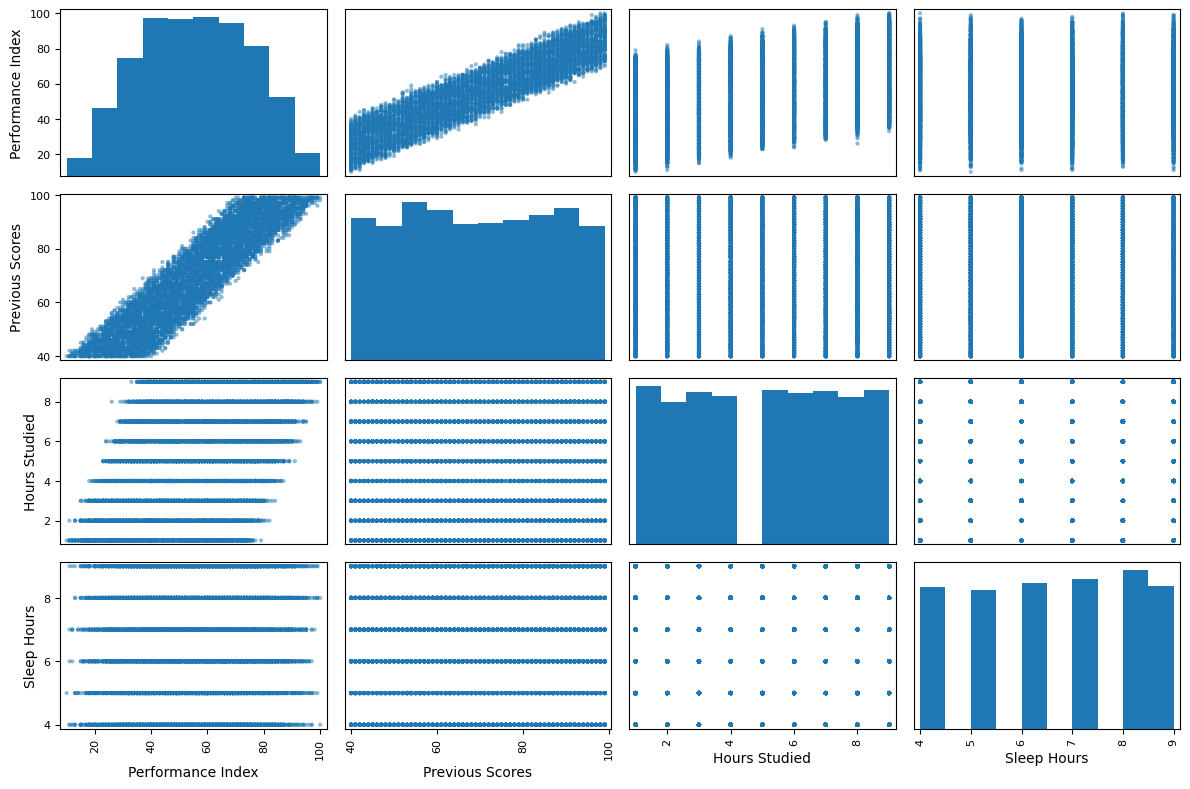

In [49]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Performance Index", "Previous Scores", "Hours Studied",
              "Sleep Hours"]
scatter_matrix(student[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [50]:
student["sleep_study"] = student["Hours Studied"]/student["Sleep Hours"]

In [51]:
corr_matrix = student.corr()
corr_matrix["Performance Index"].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915243
Hours Studied                       0.376126
sleep_study                         0.299344
Sample Question Papers Practiced    0.052325
Sleep Hours                         0.044493
Extracurricular Activities          0.021218
Name: Performance Index, dtype: float64

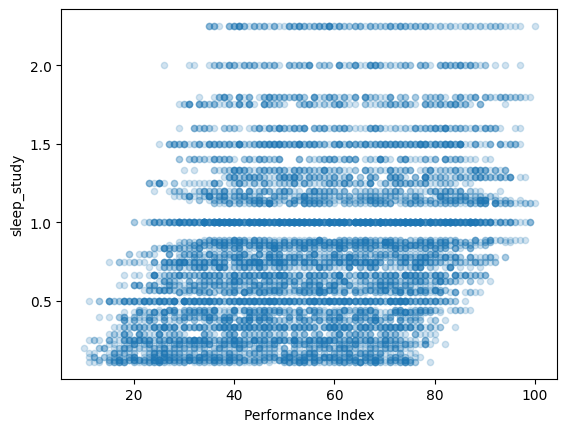

In [52]:
student.plot(kind="scatter", x="Performance Index", y="sleep_study",
             alpha=0.2)
plt.show()

# Prepare data

In [54]:
student = strat_train_set.drop("Performance Index", axis=1) # drop labels for training set
student_labels = strat_train_set["Performance Index"].copy() #Build label

# Data cleaning

In [55]:
sample_incomplete_rows = student[student.isnull().any(axis=1)].head()
sample_incomplete_rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced


it's actually a dataset from kaggle so it's already cleaned. We could have put average value in case of incomplete one.

In [56]:
student_act = student[["Extracurricular Activities"]]
student_act.head(10)

,Extracurricular Activities
2183,No
764,Yes
36,No
2878,Yes
8387,No
9707,No
2160,Yes
6510,No
9584,No
8363,No


I've to encode the value yes or no in number, the easiest way is to change for 0 and 1

In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(student_act)
housing_cat_encoded[:2]

array([[0.],
       [1.]])

In [59]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
student_act_1hot = cat_encoder.fit_transform(student_act)
student_act_1hot

<8000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 8000 stored elements in Compressed Sparse Row format>

In [61]:
student_act_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

student_num = student.select_dtypes(include=[np.number])
num_attribs = student_num.columns.tolist()

cat_attribs = ["Extracurricular Activities"]

num_pipeline = Pipeline([
    ('passthrough', 'passthrough')  # No need to change anything as it's already cleaned
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())  #One-hot to change Yes and No
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])


# Appliquer le pipeline complet aux données
student_prepared = full_pipeline.fit_transform(student)

In [63]:
student_prepared.shape #Let's see the shape

(8000, 6)

In [64]:
student_prepared #Let's check quick how does the data look like

array([[ 8., 53.,  7.,  1.,  1.,  0.],
       [ 6., 92.,  9.,  4.,  0.,  1.],
       [ 4., 59.,  8.,  3.,  1.,  0.],
       ...,
       [ 6., 54.,  4.,  7.,  1.,  0.],
       [ 6., 52.,  4.,  1.,  1.,  0.],
       [ 5., 65.,  9.,  0.,  1.,  0.]])

# Select and train a model

Here I'll try several model, and then I'll take the best one to tune the model

# Linear Regresion

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(student_prepared, student_labels)

LinearRegression()

In [66]:
# let's try the full preprocessing pipeline on a few training instances
some_data = student.iloc[:5]
some_labels = student_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [46.28008192 82.45437867 41.85807327 49.11566089 29.48367675]


Compare against the actual values

In [67]:
print("Labels:", list(some_labels))

Labels: [43.0, 86.0, 42.0, 52.0, 31.0]


We can already see for the first value a difference of 3, it's not that high knowing the index is between 10 and 100, so around 3% of error.
(Of course we have to determine better than this which model is the best)

In [68]:
results = {} #Let's put inside all the results to know which is the best model

In [70]:
from sklearn.metrics import mean_squared_error

student_predictions = lin_reg.predict(student_prepared)
lin_mse = mean_squared_error(student_labels, student_predictions)
lin_rmse = np.sqrt(lin_mse)

results['Linear Regression'] = (lin_rmse)
results

{'Linear Regression': 2.030627770494902}

In [71]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(student_labels, student_predictions)
lin_mae

1.6144911262881143

# Test Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(student_prepared, student_labels)

DecisionTreeRegressor(random_state=42)

In [73]:
student_predictions = tree_reg.predict(student_prepared)
tree_mse = mean_squared_error(student_labels, student_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
results['Tree Regression'] = (tree_rmse)
results

{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604}

# Polynomial regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(student_prepared, student_labels)

student_predictions = poly_reg.predict(student_prepared)
poly_mse = mean_squared_error(student_labels, student_predictions)
poly_rmse = np.sqrt(poly_mse)
poly_rmse
results['Poly Regression'] = (poly_rmse)
results

{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882}

# Ridge and Lasso

In [75]:
from sklearn.linear_model import Ridge

# Créer un modèle de régression Ridge
ridge_reg = Ridge(alpha=1.0)  # alpha est le paramètre de régularisation, plus alpha est grand, plus la régularisation est forte

# Entraîner le modèle sur les données d'entraînement
ridge_reg.fit(student_prepared, student_labels)

# Faire des prédictions sur les données de test
student_predictions = ridge_reg.predict(student_prepared)

redge_mse = mean_squared_error(student_labels, student_predictions)
redge_rmse = np.sqrt(redge_mse)
results['Redge Regression'] = (redge_rmse)
results

{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882,
 'Redge Regression': 2.030627776891248}

In [80]:
from sklearn.linear_model import Lasso

# Créer un modèle de régression Lasso
lasso_reg = Lasso(alpha=1)  # alpha est le paramètre de régularisation, plus alpha est grand, plus la régularisation est forte

# Entraîner le modèle sur les données d'entraînement
lasso_reg.fit(student_prepared, student_labels)

# Faire des prédictions sur les données de test
student_predictions = lasso_reg.predict(student_prepared)

lasso_mse = mean_squared_error(student_labels, student_predictions)
lasso_rmse = np.sqrt(lasso_mse)

results['Lasso Regression'] = (lasso_rmse)
results


{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882,
 'Redge Regression': 2.030627776891248,
 'Lasso Regression': 2.1978887229739787}

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle d'arbre de décision
tree_clf = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement
tree_clf.fit(student_prepared, student_labels)

# Faire des prédictions sur les données de test
student_predictions = tree_clf.predict(student_prepared)

tree_clf_mse = mean_squared_error(student_labels, student_predictions)
tree_clf_rmse = np.sqrt(tree_clf_mse)
tree_clf_rmse

results['Decision Tree'] = (tree_clf_rmse)
results

{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882,
 'Redge Regression': 2.030627776891248,
 'Lasso Regression': 2.1978887229739787,
 'Decision Tree': 0.6925496372102147}

# SVM

In [84]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(student_prepared, student_labels)
student_predictions = svm_reg.predict(student_prepared)
svm_mse = mean_squared_error(student_labels, student_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

results['SVM'] = (svm_rmse)
results

{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882,
 'Redge Regression': 2.030627776891248,
 'Lasso Regression': 2.1978887229739787,
 'Decision Tree': 0.6925496372102147,
 'SVM': 2.031248709888962}

# Gradient Boost

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# Créer un modèle de Gradient Boosting
gb_reg = GradientBoostingRegressor()

# Entraîner le modèle sur les données d'entraînement
gb_reg.fit(student_prepared, student_labels)

# Faire des prédictions sur les données de test
y_pred_gb = gb_reg.predict(student_prepared)

gb_mse = mean_squared_error(student_labels, student_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_rmse

results['GB'] = (gb_rmse)
results



{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882,
 'Redge Regression': 2.030627776891248,
 'Lasso Regression': 2.1978887229739787,
 'Decision Tree': 0.6925496372102147,
 'SVM': 2.031248709888962,
 'GB': 2.031248709888962}

In [87]:
results

{'Linear Regression': 2.030627770494902,
 'Tree Regression': 0.48900408996244604,
 'Poly Regression': 2.029216558958882,
 'Redge Regression': 2.030627776891248,
 'Lasso Regression': 2.1978887229739787,
 'Decision Tree': 0.6925496372102147,
 'SVM': 2.031248709888962,
 'GB': 2.031248709888962}

Look like the tree regression is the best model

# Cross validation

Let's see our models with cross-validation

In [88]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [90]:
score_cross = {}

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

score_cross["Tree Reg"] = tree_rmse_scores.mean()
score_cross

Scores: [2.95327619 2.91716067 3.00327946 3.13905727 3.03454074 2.94692636
 3.11152651 3.10303391 3.08088304 3.13976512]
Mean: 3.0429449273759643
Standard deviation: 0.07942975276024694


{'Tree Reg': 3.0429449273759643}

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

score_cross["Linear cross"] = lin_rmse_scores.mean()
score_cross

Scores: [2.02228767 2.01550707 1.98338312 2.04009967 2.01872618 1.97481522
 2.08660551 2.09658205 2.04158583 2.04015307]
Mean: 2.0319745368643987
Standard deviation: 0.036814130938566426


{'Tree Reg': 3.0429449273759643, 'Linear cross': 2.0319745368643987}

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(poly_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
poly_rmse_scores = np.sqrt(-scores)
display_scores(poly_rmse_scores)

score_cross["Polynomial cross"] = poly_rmse_scores.mean()
score_cross

Scores: [2.02784462 2.01690205 1.98132107 2.04637238 2.02377966 1.97723122
 2.08616005 2.09605312 2.04384109 2.04126198]
Mean: 2.0340767244863303
Standard deviation: 0.03647781332961096


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303}

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)
display_scores(ridge_rmse_scores)

score_cross["Ridge cross"] = ridge_rmse_scores.mean()
score_cross

Scores: [2.02229814 2.01551046 1.98338422 2.04009817 2.01872095 1.97482027
 2.0865994  2.09657735 2.04158668 2.04014953]
Mean: 2.0319745186139384
Standard deviation: 0.036811141979924154


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384}

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)
display_scores(lasso_rmse_scores)

score_cross["Lasso cross"] = lasso_rmse_scores.mean()
score_cross

Scores: [2.2470389  2.18311301 2.14647621 2.20788715 2.16176172 2.14352057
 2.23145243 2.2579126  2.24489888 2.16907372]
Mean: 2.199313518571156
Standard deviation: 0.04169853795207654


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384,
 'Lasso cross': 2.199313518571156}

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_clf_rmse_scores = np.sqrt(-scores)
display_scores(tree_clf_rmse_scores)

score_cross["Tree clf cross"] = tree_clf_rmse_scores.mean()
score_cross

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Scores: [3.01558452 2.95423425 3.09717613 3.25787507 3.00062493 2.93214938
 3.15812444 3.17647603 3.24403298 3.14821378]
Mean: 3.098449153584421
Standard deviation: 0.11118832066357098


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384,
 'Lasso cross': 2.199313518571156,
 'Tree clf cross': 3.098449153584421}

In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)
display_scores(svm_reg_rmse_scores)

score_cross["SVM cross"] = svm_reg_rmse_scores.mean()
score_cross

Scores: [2.02361377 2.01636558 1.9850584  2.03999201 2.02093106 1.97262153
 2.08600527 2.09755694 2.04611882 2.03958921]
Mean: 2.032785258482119
Standard deviation: 0.0370074669042732


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384,
 'Lasso cross': 2.199313518571156,
 'Tree clf cross': 3.098449153584421,
 'SVM cross': 2.032785258482119}

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb_reg, student_prepared, student_labels,
                         scoring="neg_mean_squared_error", cv=10)
gb_reg_rmse_scores = np.sqrt(-scores)
display_scores(gb_reg_rmse_scores)

score_cross["GB cross"] = gb_reg_rmse_scores.mean()
score_cross

Scores: [2.09187093 2.11166414 2.06013915 2.11456144 2.10204621 2.04622001
 2.13228215 2.16867905 2.13216467 2.09899346]
Mean: 2.1058621208555803
Standard deviation: 0.033690376729583


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384,
 'Lasso cross': 2.199313518571156,
 'Tree clf cross': 3.098449153584421,
 'SVM cross': 2.032785258482119,
 'GB cross': 2.1058621208555803}

In [99]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(tree_reg, student_prepared, student_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

score_cross["Tree Regression"] = forest_rmse_scores.mean()
score_cross

Scores: [2.95327619 2.91716067 3.00327946 3.13905727 3.03454074 2.94692636
 3.11152651 3.10303391 3.08088304 3.13976512]
Mean: 3.0429449273759643
Standard deviation: 0.07942975276024694


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384,
 'Lasso cross': 2.199313518571156,
 'Tree clf cross': 3.098449153584421,
 'SVM cross': 2.032785258482119,
 'GB cross': 2.1058621208555803,
 'Tree Regression': 3.0429449273759643}

Let's take the Tree Regression without cross validation

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(student_prepared, student_labels)

student_predictions = forest_reg.predict(student_prepared)
forest_mse = mean_squared_error(student_labels, student_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.9549665322793668

In [101]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, student_prepared, student_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

score_cross["Tree Regression"] = forest_rmse_scores.mean()
score_cross

Scores: [2.27076398 2.26970136 2.24218649 2.41754365 2.36256232 2.29882795
 2.3902606  2.4239353  2.3927504  2.35806387]
Mean: 2.3426595913383492
Standard deviation: 0.06334797330881585


{'Tree Reg': 3.0429449273759643,
 'Linear cross': 2.0319745368643987,
 'Polynomial cross': 2.0340767244863303,
 'Ridge cross': 2.0319745186139384,
 'Lasso cross': 2.199313518571156,
 'Tree clf cross': 3.098449153584421,
 'SVM cross': 2.032785258482119,
 'GB cross': 2.1058621208555803,
 'Tree Regression': 2.3426595913383492}

# Tune the model

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 16, 20]
}


tree_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(tree_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(student_prepared, student_labels)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 16, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [158]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [159]:
grid_search.best_estimator_

DecisionTreeRegressor(min_samples_leaf=8, random_state=42)

In [160]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.043981425151387 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
2.831442230413092 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
2.611804153533988 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
2.4789159139553525 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
2.760724423095825 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
2.7201626981058813 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
2.565486377279245 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
2.4671743471158485 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
2.5193022005015226 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
2.5193022005015226 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
2.4952529701074577 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
2.4503077267643776 {'max_depth': None, 'min_samples_le

In [161]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018595,0.001354,0.001003,0.000007,None,1,2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-8.721840,-8.509826,...,-0.226134,-0.212708,-0.212361,-0.216181,-0.197639,-0.212014,-0.216713,-0.215532,-0.215380,0.007465
1,0.014197,0.000758,0.001202,0.000402,None,1,5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-7.422118,-7.414097,...,-1.366875,-1.374850,-1.374838,-1.376840,-1.361412,-1.341053,-1.372257,-1.363090,-1.370353,0.018184
2,0.011198,0.000747,0.000902,0.000301,None,1,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.510148,-6.408698,...,-2.616947,-2.556108,-2.553383,-2.540064,-2.568989,-2.519946,-2.563373,-2.546239,-2.559607,0.025810
3,0.009307,0.001183,0.001190,0.000387,None,1,20,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-5.957340,-5.970556,...,-3.683714,-3.667015,-3.594246,-3.642545,-3.658438,-3.614784,-3.604940,-3.619831,-3.645154,0.036595
4,0.015901,0.001294,0.001401,0.000495,None,2,2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-7.031519,-7.166535,...,-1.546891,-1.521081,-1.507299,-1.513329,-1.524111,-1.490887,-1.502519,-1.517771,-1.525599,0.024726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.007823,0.000613,0.000804,0.000402,100,16,20,"{'max_depth': 100, 'min_samples_leaf': 16, 'mi...",-6.065396,-5.820028,...,-4.789298,-4.770429,-4.814530,-4.793516,-4.680286,-4.797690,-4.764725,-4.731012,-4.775708,0.040153
212,0.008398,0.000912,0.001100,0.000540,100,20,2,"{'max_depth': 100, 'min_samples_leaf': 20, 'mi...",-6.199541,-5.917999,...,-5.149215,-5.148295,-5.156303,-5.176012,-5.103231,-5.105020,-5.137429,-5.116868,-5.141283,0.023794
213,0.011098,0.001223,0.001403,0.001024,100,20,5,"{'max_depth': 100, 'min_samples_leaf': 20, 'mi...",-6.199541,-5.917999,...,-5.149215,-5.148295,-5.156303,-5.176012,-5.103231,-5.105020,-5.137429,-5.116868,-5.141283,0.023794
214,0.015696,0.011193,0.001002,0.000004,100,20,10,"{'max_depth': 100, 'min_samples_leaf': 20, 'mi...",-6.199541,-5.917999,...,-5.149215,-5.148295,-5.156303,-5.176012,-5.103231,-5.105020,-5.137429,-5.116868,-5.141283,0.023794


In [164]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=0, high=200),
        'min_samples_split': randint(low=2, high=50),
        'min_samples_leaf' : randint(low = 1, high = 50)
    }

forest_reg = DecisionTreeRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(student_prepared, student_labels)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AA0AB8B3D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AA0AB9BA00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AA0AB9AE60>},
                   random_state=42, scoring='neg_mean_squared_error')

In [165]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.63111917768801 {'max_depth': 102, 'min_samples_leaf': 29, 'min_samples_split': 16}
2.478561599649786 {'max_depth': 106, 'min_samples_leaf': 8, 'min_samples_split': 22}
2.514649071416778 {'max_depth': 102, 'min_samples_leaf': 19, 'min_samples_split': 24}
2.4767889455748424 {'max_depth': 74, 'min_samples_leaf': 11, 'min_samples_split': 25}
2.719753039885084 {'max_depth': 116, 'min_samples_leaf': 36, 'min_samples_split': 41}
2.4963205386677463 {'max_depth': 151, 'min_samples_leaf': 3, 'min_samples_split': 23}
2.495328648311498 {'max_depth': 52, 'min_samples_leaf': 2, 'min_samples_split': 25}
2.756517720024364 {'max_depth': 157, 'min_samples_leaf': 38, 'min_samples_split': 3}
2.5342963010070547 {'max_depth': 191, 'min_samples_leaf': 21, 'min_samples_split': 34}
2.538893535804882 {'max_depth': 57, 'min_samples_leaf': 22, 'min_samples_split': 45}
2.9161891336650596 {'max_depth': 88, 'min_samples_leaf': 49, 'min_samples_split': 28}
2.81136818840342 {'max_depth': 58, 'min_samples_leaf': 42, 

# Analyze best models and errors

In [166]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([1.43777110e-01, 8.52853193e-01, 1.86930031e-03, 1.24069130e-03,
       1.07439840e-04, 1.52265143e-04])

# Evaluate the system

In [167]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("Performance Index", axis=1)
y_test = strat_test_set["Performance Index"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [168]:
final_rmse

2.444605443547717

# Final 95% confidence

In [169]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.3641438 , 2.52250186])

So between 2.6% and 2.8% in the prediction

In [170]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("DecisionTreeRegression", DecisionTreeRegressor())
    ])

full_pipeline_with_predictor.fit(student, student_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('DecisionTreeRegression', DecisionTreeRegressor())])

In [171]:
Student_model = full_pipeline_with_predictor

In [172]:
import joblib

joblib.dump(Student_model,"Student_model.pkl")

['Student_model.pkl']